In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
# Import the data
drug_consumption_df = pd.read_csv('drug_consumption.data', header=None)

In [3]:
# Head of the data
drug_consumption_df.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,1,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
1,2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,...,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
2,3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,...,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
3,4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,...,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
4,5,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,...,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0


- Add names to columns
- Drop the irrelevant ID column
- Drop all instances where users claimed to have used semeron, since it is a fictitious drug introduced to identify over-claimers and ensure data quality
- Drop the semeron class

In [4]:
# Add column names
drug_consumption_df.columns = ['ID','Age','Gender','Education','Country','Ethnicity','Nscore','Escore','Oscore','Ascore','Cscore','Impulsive','SS','Alcohol','Amphet','Amyl','Benzos','Caff','Cannabis','Choc','Coke','Crack','Ecstasy','Heroin','Ketamine','Legalh','LSD','Meth','Mushrooms','Nicotine','Semer','VSA']
# Drop the ID column
drug_consumption_df = drug_consumption_df.drop('ID', axis=1)
# Drop all entries for which people claim to have taken the fake drug 'Semeron'
drug_consumption_df = drug_consumption_df[drug_consumption_df['Semer'] == 'CL0']
# Drop the semeron column
drug_consumption_df = drug_consumption_df.drop('Semer', axis=1)
# Inspect
drug_consumption_df.head()

,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,...,Crack,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,VSA
0,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0
1,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,-0.14277,...,CL0,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0
2,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0
3,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,0.58489,...,CL0,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0
4,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,1.30612,...,CL0,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0


### What do we want to do?
| Problem Type | Number of Targets | Target Cardinality | `type_of_target` |
|--------------|------------------|--------------------|------------------|
| Multiclass classification | 1 | >2 | `multiclass` |
| Multilabel classification | >1 | 2 (0 or 1) | `multilabel-indicator` |
| Multiclass-multioutput classification | >1 | >2 | `multiclass-multioutput` |
| Multioutput regression | >1 | Continuous | `continuous-multioutput` |


In [5]:
# Missing values
# drug_consumption_df.isnull().sum()
drug_consumption_df.isna().sum()

Age          0
Gender       0
Education    0
Country      0
Ethnicity    0
Nscore       0
Escore       0
Oscore       0
Ascore       0
Cscore       0
Impulsive    0
SS           0
Alcohol      0
Amphet       0
Amyl         0
Benzos       0
Caff         0
Cannabis     0
Choc         0
Coke         0
Crack        0
Ecstasy      0
Heroin       0
Ketamine     0
Legalh       0
LSD          0
Meth         0
Mushrooms    0
Nicotine     0
VSA          0
dtype: int64

In [6]:
# Encoder
def CL_encoder(x):
    drug_dict = {'CL0': 0, 'CL1': 1, 'CL2': 2, 'CL3': 3, 'CL4': 4, 'CL5': 5, 'CL6': 6}
    return drug_dict.get(x, 7)

In [7]:
# Apply encoder
drug_consumption_df[drug_consumption_df.columns[12:]] = drug_consumption_df[drug_consumption_df.columns[12:]].applymap(CL_encoder)
# Inspect
drug_consumption_df.head()

,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,...,Crack,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,VSA
0,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,...,0,0,0,0,0,0,0,0,2,0
1,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,-0.14277,...,0,4,0,2,0,2,3,0,4,0
2,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,...,0,0,0,0,0,0,0,1,0,0
3,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,0.58489,...,0,0,0,2,0,0,0,0,2,0
4,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,1.30612,...,0,1,0,0,1,0,0,2,2,0


In [8]:
# Export
#drug_consumption_df.to_csv('drug_consumption-prepro.csv', index=False)

# Some Exploration

<AxesSubplot:>

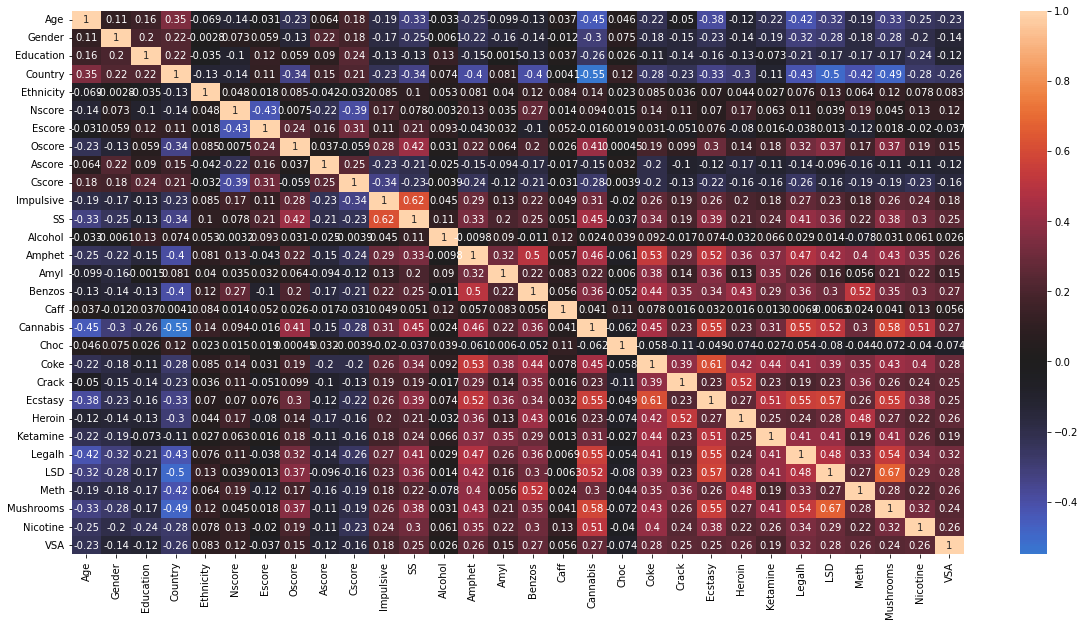

In [9]:
plt.figure(figsize=(20,10))
# Correlation matrix
corr_matrix = drug_consumption_df.corr()
sns.heatmap(corr_matrix, annot=True, center=0)

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Gender'}>,
        <AxesSubplot:title={'center':'Education'}>,
        <AxesSubplot:title={'center':'Country'}>,
        <AxesSubplot:title={'center':'Ethnicity'}>],
       [<AxesSubplot:title={'center':'Nscore'}>,
        <AxesSubplot:title={'center':'Escore'}>,
        <AxesSubplot:title={'center':'Oscore'}>,
        <AxesSubplot:title={'center':'Ascore'}>,
        <AxesSubplot:title={'center':'Cscore'}>],
       [<AxesSubplot:title={'center':'Impulsive'}>,
        <AxesSubplot:title={'center':'SS'}>,
        <AxesSubplot:title={'center':'Alcohol'}>,
        <AxesSubplot:title={'center':'Amphet'}>,
        <AxesSubplot:title={'center':'Amyl'}>],
       [<AxesSubplot:title={'center':'Benzos'}>,
        <AxesSubplot:title={'center':'Caff'}>,
        <AxesSubplot:title={'center':'Cannabis'}>,
        <AxesSubplot:title={'center':'Choc'}>,
        <AxesSubplot:title={'center':'Coke'}>],
       [<AxesSubpl

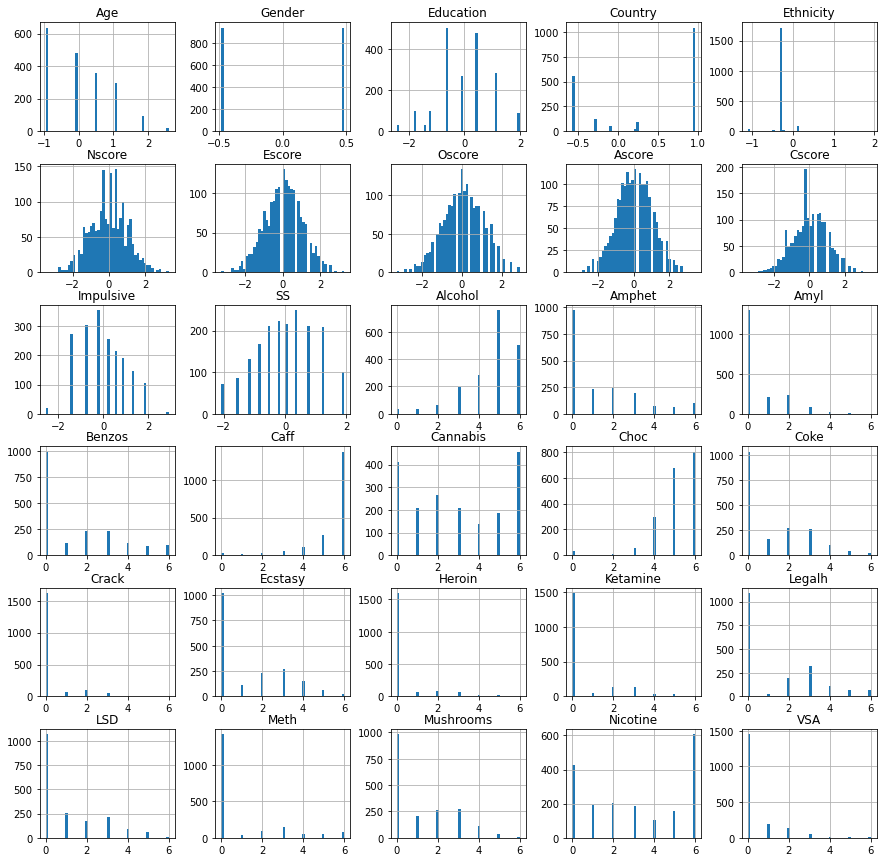

In [10]:
drug_consumption_df.hist(bins=50, figsize=(15,15))